In [1]:
import os
import imp
import matplotlib.pyplot as plt
import numpy as np
import math
import pandas as pd
import sys
import pickle
import matplotlib.ticker as plticker
import mat73
os.add_dll_directory('C:\\Program Files\\Lumerical\\v202\\api\\python\\')
lumapi = imp.load_source('lumapi','C:\\Program Files\\Lumerical\\v202\\api\\python\\lumapi.py') 

#sys.path.append("/opt/lumerical/v221/api/python") #Default linux lumapi path
#import lumapi
#sys.path.append(os.path.dirname('/media/lucas/datam01/LucasLobo/RessonanceRIng')) #Current directory


#from jupyterthemes import jtplot
#jtplot.style(theme='onedork', context='notebook', ticks=True, grid=True)
plt.rcParams["figure.figsize"] = (15,7)

# FDTD

## MMI

In [2]:
fdtd = lumapi.FDTD(filename='FDTD_MMI_2X2.fsp')

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


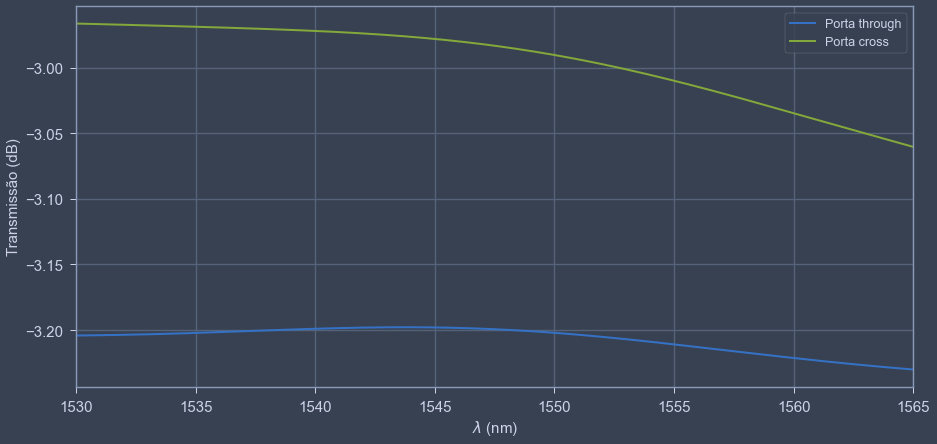

In [3]:
Tthrough = fdtd.getresult('FDTD::ports::port3','T')
Tcross = fdtd.getresult('FDTD::ports::port4','T')

print(Tthrough.keys())
plt.plot(Tthrough['lambda']*1e9,10*np.log10(Tthrough['T']),linewidth=2,label='Porta through')
plt.plot(Tthrough['lambda']*1e9,10*np.log10(Tcross['T']),linewidth=2,label='Porta cross')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


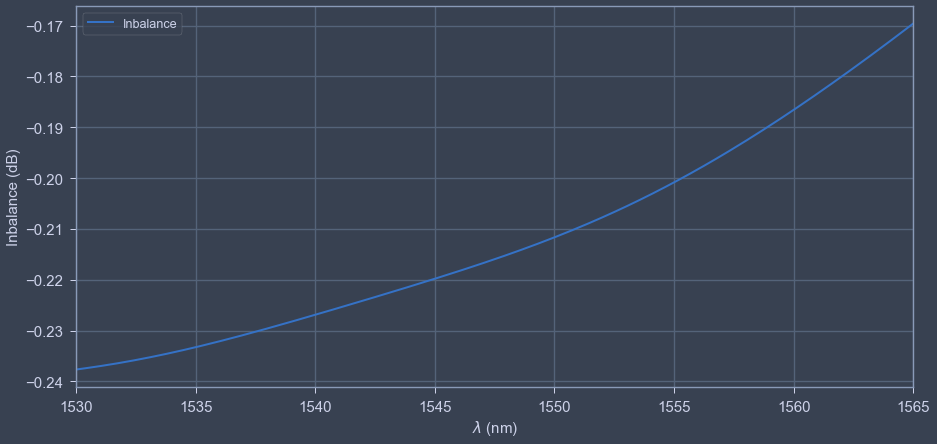

In [4]:
Tthrough = fdtd.getresult('FDTD::ports::port3','T')
Tcross = fdtd.getresult('FDTD::ports::port4','T')

print(Tthrough.keys())
plt.plot(Tthrough['lambda']*1e9,10*np.log10(Tthrough['T']/Tcross['T']),linewidth=2,label='Inbalance')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Inbalance (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


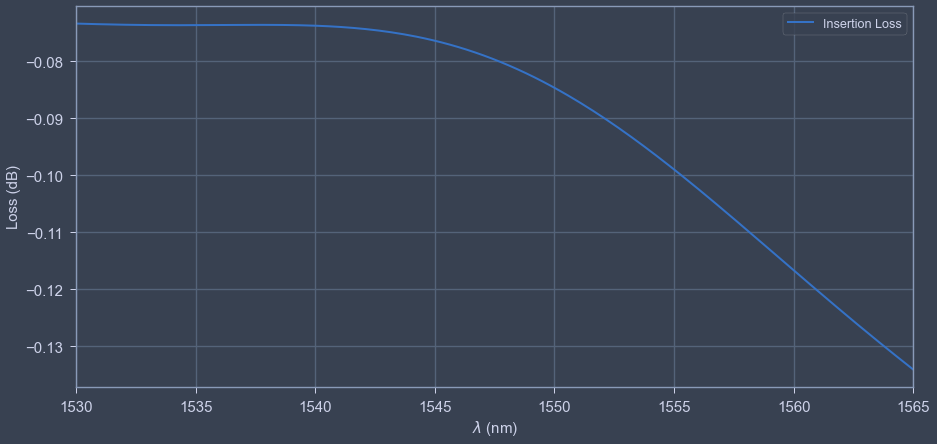

In [5]:
Tthrough = fdtd.getresult('FDTD::ports::port3','T')
Tcross = fdtd.getresult('FDTD::ports::port4','T')

print(Tthrough.keys())
plt.plot(Tthrough['lambda']*1e9,10*np.log10(Tthrough['T']+Tcross['T']),linewidth=2,label='Insertion Loss')

plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Loss (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

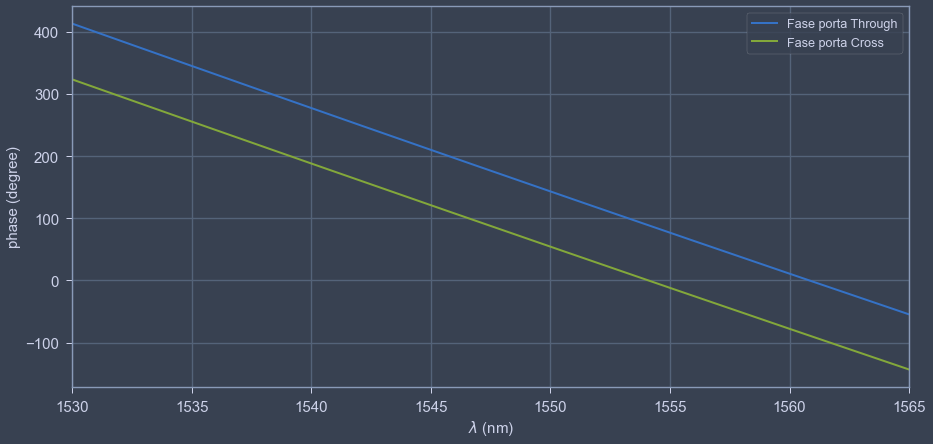

In [10]:
Sthrough = fdtd.getresult('FDTD::ports::port3','S')
Scross = fdtd.getresult('FDTD::ports::port4','S')

dados = mat73.loadmat('DadosPhaseMMI2.mat')['lum']
x = dados['x0'] 
fasethrough = dados['y0'] 
fasecross = dados['y1'] 

plt.plot(x*1e21,fasethrough,linewidth=2,label='Fase porta Through')
plt.plot(x*1e21,fasecross,linewidth=2,label='Fase porta Cross')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'phase (degree)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()




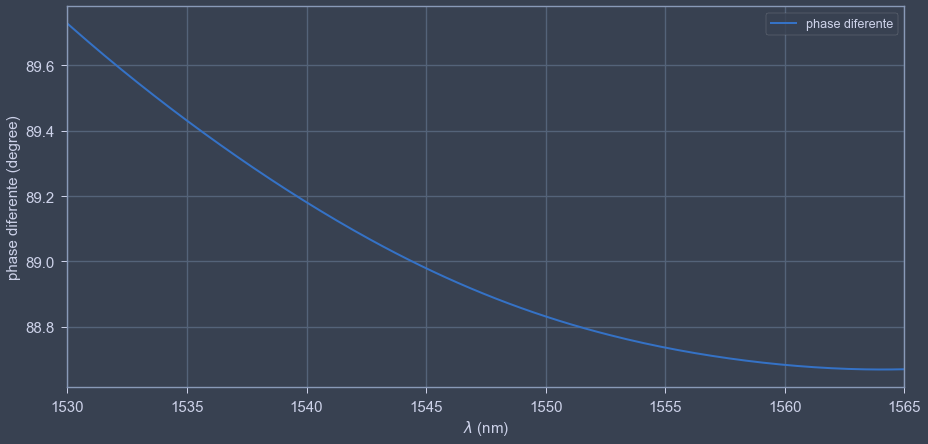

In [12]:
Sthrough = fdtd.getresult('FDTD::ports::port3','S')
Scross = fdtd.getresult('FDTD::ports::port4','S')

dados = mat73.loadmat('DadosPhaseMMI2.mat')['lum']
x = dados['x0'] 
fasethrough = dados['y0'] 
fasecross = dados['y1'] 

plt.plot(x*1e21,(fasethrough-fasecross),linewidth=2,label='phase diferente')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'phase diferente (degree)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

## Y Branch

In [13]:
fdtd = lumapi.FDTD(filename='FDTD_Y_Branch.fsp')

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


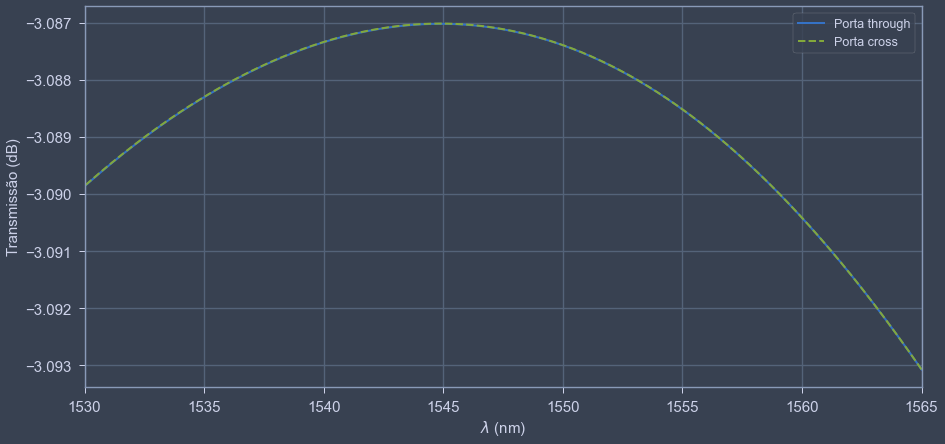

In [15]:
Out1 = fdtd.getresult('FDTD::ports::port 2','T')
Out2 = fdtd.getresult('FDTD::ports::port 3','T')

print(Out1.keys())
plt.plot(Out1['lambda']*1e9,10*np.log10(Out1['T']),linewidth=2,label='Porta through')
plt.plot(Out1['lambda']*1e9,10*np.log10(Out2['T']),linewidth=2,label='Porta cross',linestyle='--')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


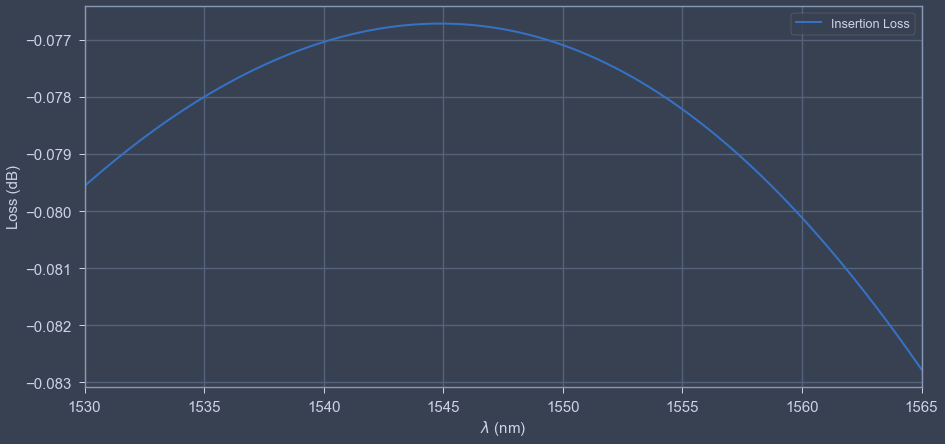

In [17]:
Out1 = fdtd.getresult('FDTD::ports::port 2','T')
Out2 = fdtd.getresult('FDTD::ports::port 3','T')

print(Out1.keys())
plt.plot(Out1['lambda']*1e9,10*np.log10(Out1['T']+Out2['T']),linewidth=2,label='Insertion Loss')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Loss (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

## Bend

In [2]:
fdtd = lumapi.FDTD(filename='FDTD_Bend.fsp')

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


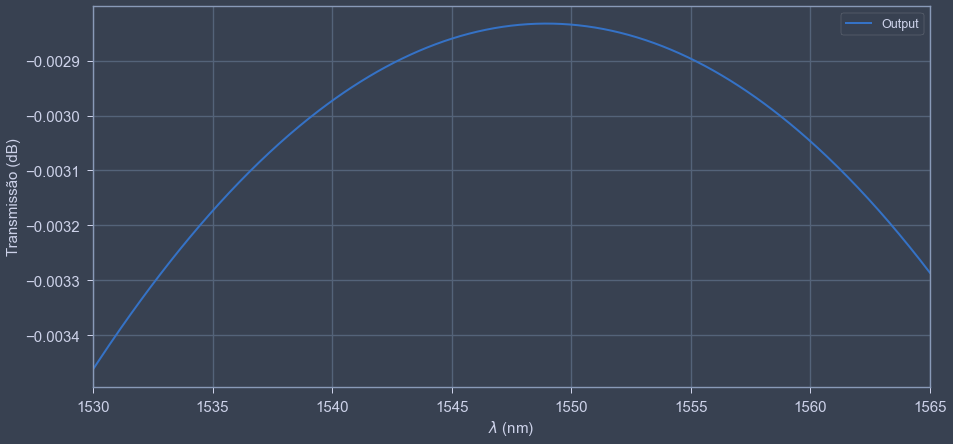

In [4]:
Out1 = fdtd.getresult('FDTD::ports::port 2','T')


print(Out1.keys())
plt.plot(Out1['lambda']*1e9,10*np.log10(abs(Out1['T'])),linewidth=2,label='Output')
#plt.plot(Out1['lambda']*1e9,(Out1['T']),linewidth=2,label='Output')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()

## S Bend

In [2]:
fdtd = lumapi.FDTD(filename='FDTD_S_bend.fsp')

dict_keys(['lambda', 'f', 'T', 'Lumerical_dataset'])


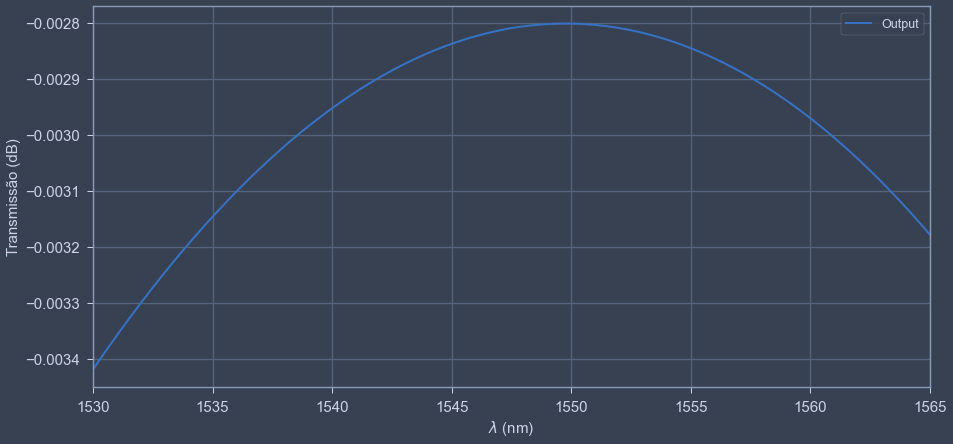

In [4]:
Out1 = fdtd.getresult('FDTD::ports::port 2','T')


print(Out1.keys())
plt.plot(Out1['lambda']*1e9,10*np.log10(abs(Out1['T'])),linewidth=2,label='Output')
#plt.plot(Out1['lambda']*1e9,(Out1['T']),linewidth=2,label='Output')
plt.xlim(1530,1565)
plt.xlabel(r'$\lambda$ (nm)',fontsize =15)
plt.ylabel(r'Transmissão (dB)',fontsize =15)
plt.xticks(fontsize =15)
plt.yticks(fontsize =15)
plt.legend()